In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Set style
plt.style.use('default')

## Multinomail Naive Bayes (for text classification)

=== Multinomial Naive Bayes - Text Classification ===
Dataset: 2954 documents
Categories: ['comp.graphics', 'rec.sport.baseball', 'sci.space']
Multinomial Naive Bayes Accuracy: 0.9673


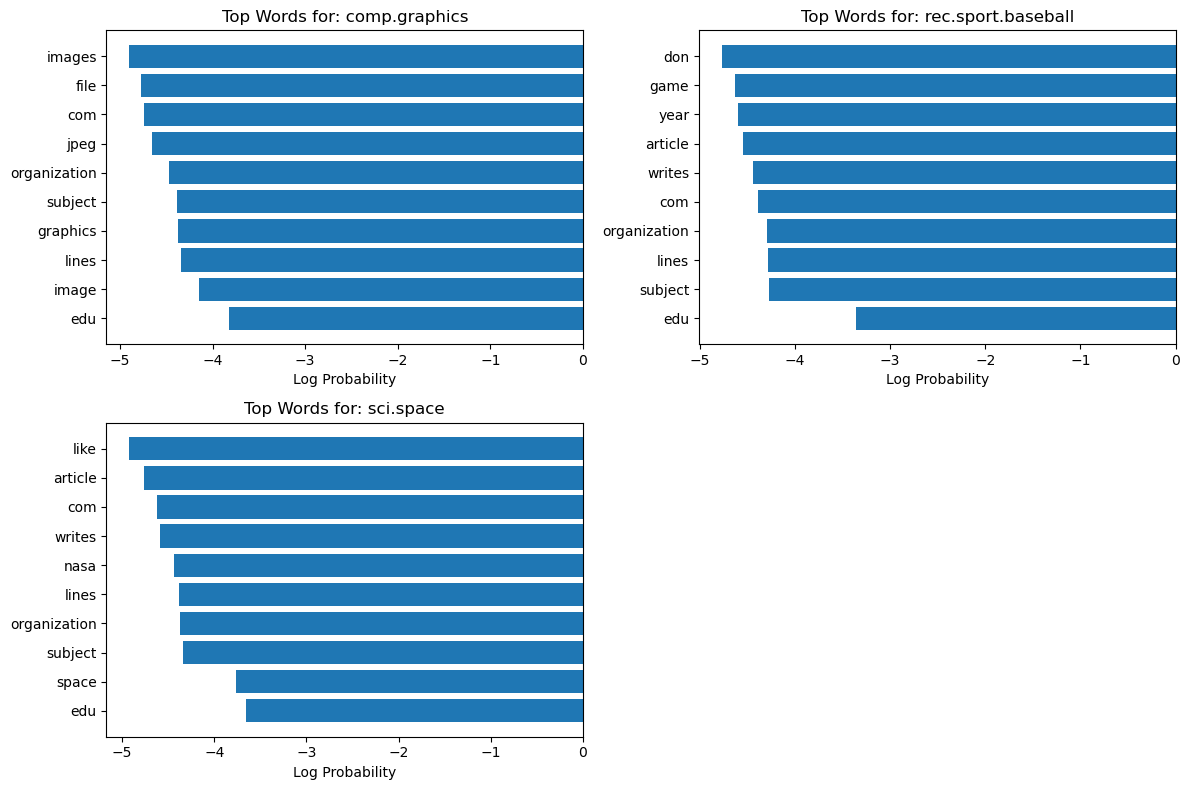

In [3]:
# Load text dataset
print("=== Multinomial Naive Bayes - Text Classification ===")
categories = ['sci.space', 'comp.graphics', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

X_text = newsgroups.data
y_text = newsgroups.target
target_names = newsgroups.target_names

print(f"Dataset: {len(X_text)} documents")
print(f"Categories: {target_names}")

# Convert text to word counts
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(X_text)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_counts, y_text, test_size=0.3, random_state=42)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Calculate accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb:.4f}")

# Visualization: Feature Importance (Top words per class)
plt.figure(figsize=(12, 8))
feature_names = vectorizer.get_feature_names_out()

for i, class_name in enumerate(target_names):
    plt.subplot(2, 2, i+1)
    # Get top 10 features for this class
    top_indices = mnb.feature_log_prob_[i].argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_indices]
    top_scores = mnb.feature_log_prob_[i][top_indices]
    
    plt.barh(range(len(top_words)), top_scores)
    plt.yticks(range(len(top_words)), top_words)
    plt.title(f'Top Words for: {class_name}')
    plt.xlabel('Log Probability')

plt.tight_layout()
plt.show()

## Bernoulli Naive Bayes (for binary features)


=== Bernoulli Naive Bayes - Binary Features ===
Bernoulli Naive Bayes Accuracy: 0.9402


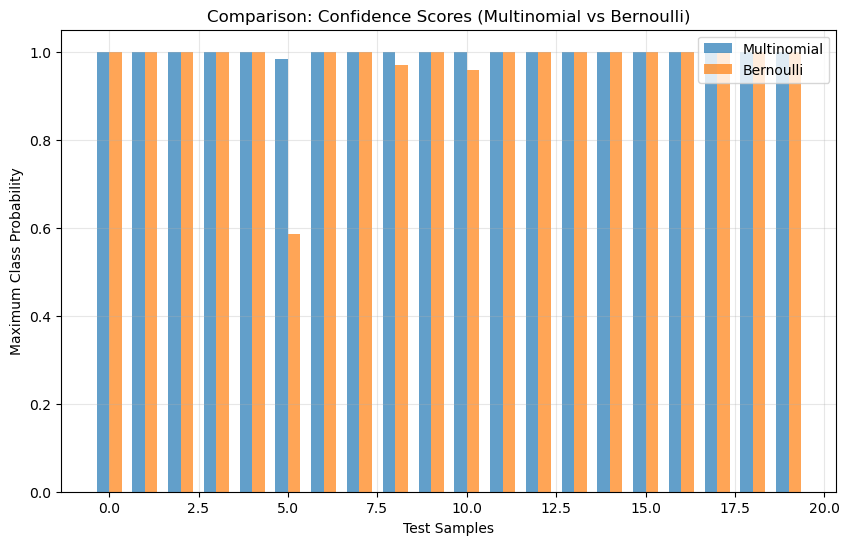

In [10]:
# Create binary dataset (convert counts to binary features)
print("\n=== Bernoulli Naive Bayes - Binary Features ===")
X_binary = (X_counts > 0).astype(int)

# Split binary data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_text, test_size=0.3, random_state=42)

# Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train_bin)
y_pred_bnb = bnb.predict(X_test_bin)

# Calculate accuracy
accuracy_bnb = accuracy_score(y_test_bin, y_pred_bnb)
print(f"Bernoulli Naive Bayes Accuracy: {accuracy_bnb:.4f}")

# Visualization: Class Probability Comparison
plt.figure(figsize=(10, 6))

# Get class probabilities for first 20 test samples
probs_mnb = mnb.predict_proba(X_test[:20])
probs_bnb = bnb.predict_proba(X_test_bin[:20])

x_pos = np.arange(20)
width = 0.35

plt.bar(x_pos - width/2, np.max(probs_mnb, axis=1), width, label='Multinomial', alpha=0.7)
plt.bar(x_pos + width/2, np.max(probs_bnb, axis=1), width, label='Bernoulli', alpha=0.7)

plt.xlabel('Test Samples')
plt.ylabel('Maximum Class Probability')
plt.title('Comparison: Confidence Scores (Multinomial vs Bernoulli)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


=== Model Comparison ===
Multinomial Naive Bayes Accuracy: 0.9673
Bernoulli Naive Bayes Accuracy: 0.9402


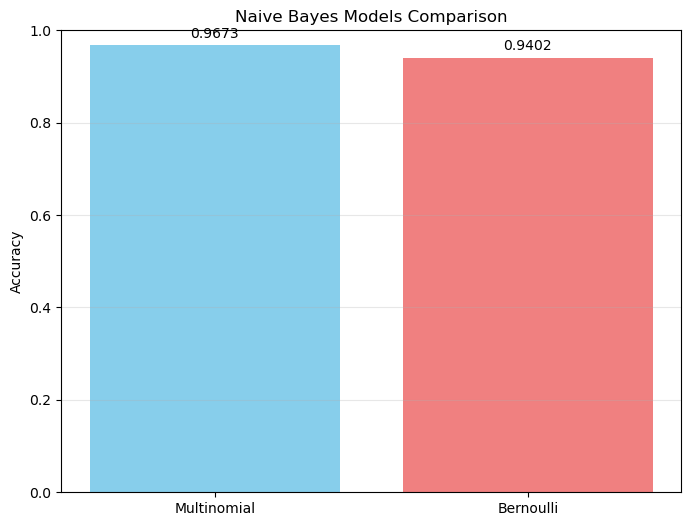

In [12]:
# Performance comparison
print("\n=== Model Comparison ===")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb:.4f}")
print(f"Bernoulli Naive Bayes Accuracy: {accuracy_bnb:.4f}")

# Combined visualization: Accuracy comparison
plt.figure(figsize=(8, 6))
models = ['Multinomial', 'Bernoulli']
accuracies = [accuracy_mnb, accuracy_bnb]

bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Models Comparison')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.show()